In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install plotly_express==0.4.0
import plotly.express as px
df = pd.read_csv('C:/Users/Kate/Downloads/Product_Analysis_data1.csv')

In [2]:
df.columns

Index(['user_id', 'install_date', 'country', 'test_group', 'trial', 'paid',
       'subscription_name', 'revenue_1m'],
      dtype='object')

In [3]:
df['install_date'] = pd.to_datetime(df['install_date'])
df['day'] = df.install_date.dt.day
df = df.dropna()
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m,day
17,003450b3db21351083edcbe510b57746,2023-06-07,GB,control,1,0,monthly.5.99.3d.trial,0.0,7
34,008c662ddb4842458bae3cbc62c65a50,2023-06-03,US,control,1,0,monthly.5.99.3d.trial,0.0,3
39,00a79c2f42f171bfec415e149d550822,2023-06-07,US,control,1,0,monthly.5.99.3d.trial,0.0,7
41,00b663a0cd6795a948f7c7c97b9012a7,2023-06-01,US,control,1,0,monthly.5.99.3d.trial,0.0,1
57,00f17a5f8c2da3e245ea34d6977098eb,2023-06-07,US,control,1,0,monthly.5.99.3d.trial,0.0,7


In [4]:
df['day'].value_counts()

1    282
5    280
6    246
2    237
7    236
4    232
3    210
Name: day, dtype: int64

In [5]:
## кількість встановлень по дням та країнам
a = df.groupby('install_date')['country'].value_counts() #sort_index

In [6]:
df['install_date'].value_counts().sort_index()

2023-06-01    282
2023-06-02    237
2023-06-03    210
2023-06-04    232
2023-06-05    280
2023-06-06    246
2023-06-07    236
Name: install_date, dtype: int64

In [7]:
df['country'].value_counts().sort_index()

AU    419
CA    427
GB    479
US    398
Name: country, dtype: int64

In [8]:
df['trial'].value_counts() # 1723 акаунтів, які почали тріал (оформили пробний період) 

1    1723
Name: trial, dtype: int64

In [9]:
df['paid'].value_counts() # 1458 які не купили підписку, 265 які купили підписку

0    1458
1     265
Name: paid, dtype: int64

1723 починають тріал > 1458 скасовують/не подовжують тріал > 265 купляють підписку
1723 = 100%
265 = 15.4 %
1458 = 84.6%

## Кількість встановлень, частота встановлень( по даті та сумі), країни встановлень
1. Який відсоток скачувань/платної підписки та яку підписку обирають найчастіше, 
2. В якій країні яка тенденція?
3. Який виходить загальний прибуток

In [10]:
df[['trial', 'paid', 'revenue_1m']].sum()

trial         1723.00
paid           265.00
revenue_1m    1487.19
dtype: float64

In [11]:
df.groupby('country')['paid'].value_counts()

country  paid
AU       0       350
         1        69
CA       0       372
         1        55
GB       0       403
         1        76
US       0       333
         1        65
Name: paid, dtype: int64

## Частина 2 - лише підписки

In [12]:
# показувати лише підписки
df2 = df[['install_date', 'country', 'test_group', 'paid',
       'subscription_name', 'revenue_1m']]
df2 = df2.loc[df2['paid'] == 1]
df2.head()

,install_date,country,test_group,paid,subscription_name,revenue_1m
351,2023-06-03,CA,control,1,monthly.5.99.3d.trial,5.99
358,2023-06-04,US,treatment,1,weekly.2.99.3d.trial,5.98
360,2023-06-07,US,control,1,monthly.5.99.3d.trial,5.99
419,2023-06-06,CA,control,1,monthly.5.99.3d.trial,5.99
442,2023-06-01,US,treatment,1,weekly.2.99.3d.trial,5.98


In [13]:
df2.groupby('country')['test_group'].value_counts() #.to_frame()

country  test_group
AU       treatment     39
         control       30
CA       treatment     37
         control       18
GB       treatment     41
         control       35
US       control       33
         treatment     32
Name: test_group, dtype: int64

In [14]:
# підписки по країнам
df2['country'].value_counts()

GB    76
AU    69
US    65
CA    55
Name: country, dtype: int64

In [15]:
# кількість підписок за групою користувачів , можна обєднати з попереднім графіком в stacked plot
df2['test_group'].value_counts(normalize=True)

treatment    0.562264
control      0.437736
Name: test_group, dtype: float64

In [16]:
# тарифи підписок в Британії
df2.loc[df2['country'] == 'GB']['revenue_1m'].value_counts()

5.99     35
2.99     21
8.97      9
5.98      9
11.96     2
Name: revenue_1m, dtype: int64

In [17]:
# зведену таблицю з ревеню, тарифом підписки та країною
a = df2.groupby(['country','test_group'])['revenue_1m'].sum().reset_index()    
a

,country,test_group,revenue_1m
0,AU,control,179.70
1,AU,treatment,209.30
2,CA,control,107.82
3,CA,treatment,185.38
4,GB,control,209.65
5,GB,treatment,221.26
6,US,control,197.67
7,US,treatment,176.41


In [18]:
b = df2.groupby(['country'])['revenue_1m'].sum().reset_index()    
b

,country,revenue_1m
0,AU,389.00
1,CA,293.20
2,GB,430.91
3,US,374.08


In [19]:
c = df2.groupby(['test_group'])['revenue_1m'].sum().reset_index()   
c

,test_group,revenue_1m
0,control,694.84
1,treatment,792.35


## Візуалізації

,country,revenue_1m
0,AU,389.00
1,CA,293.20
2,GB,430.91
3,US,374.08


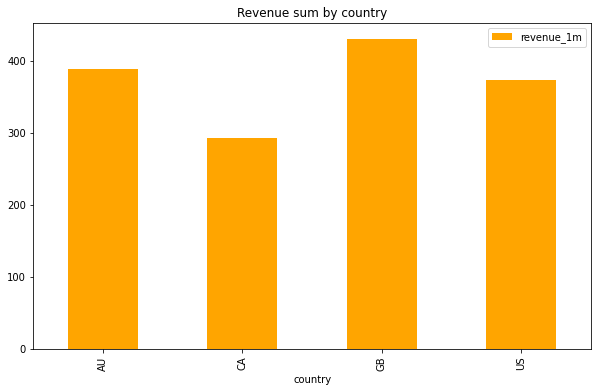

In [20]:
b.plot.bar(x='country', figsize=(10,6), color='orange', title='Revenue sum by country')
b

,test_group,revenue_1m
0,control,694.84
1,treatment,792.35


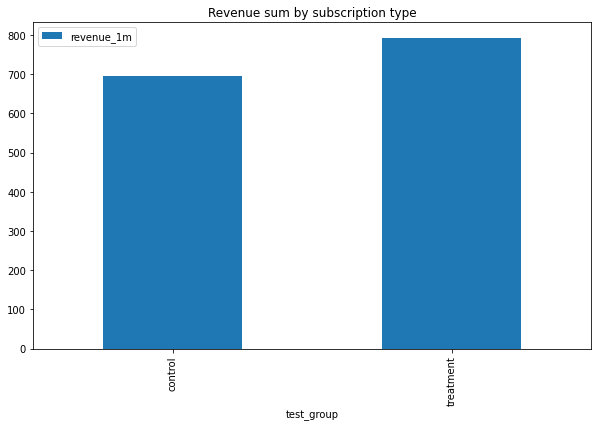

In [21]:
c.plot.bar(x='test_group', figsize=(10,6), title='Revenue sum by subscription type') 
c

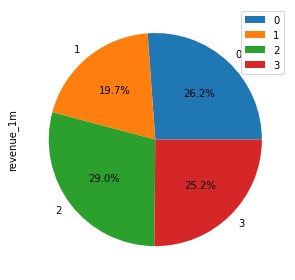

In [22]:
# Відсотки прибутку по країнах.
b.plot.pie(x='country', y='revenue_1m', autopct='%1.1f%%', use_index='country')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

GB    76
AU    69
US    65
CA    55
Name: country, dtype: int64


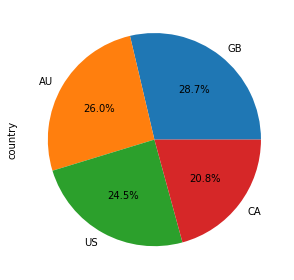

In [23]:
# Кількість підписок по країнах.   
print(df2['country'].value_counts()) # normalize=True
df2['country'].value_counts().plot.pie(autopct='%1.1f%%', use_index='country')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

2.99      74
5.98      43
5.99     116
8.97      23
11.96      9
Name: revenue_1m, dtype: int64

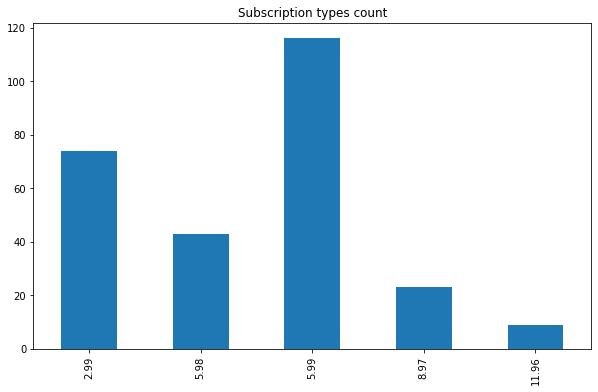

In [24]:
# Кількість підписок по тарифам, НЕПРАВИЛЬНО ПЕРЕРОБИТИ - МАЄ БУТИ ВСЬОГО 2 ТАРИФИ   
sub = df2['revenue_1m'].value_counts().sort_index()
sub.plot.bar(figsize=(10,6), title='Subscription types count')
sub

<AxesSubplot:xlabel='day'>

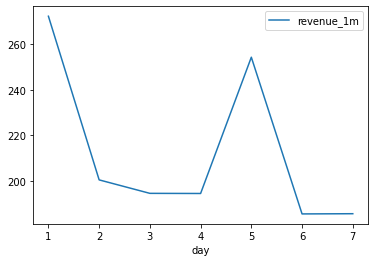

In [36]:
df.groupby(['day'])['revenue_1m'].sum().plot(legend=True) 

<AxesSubplot:xlabel='day'>

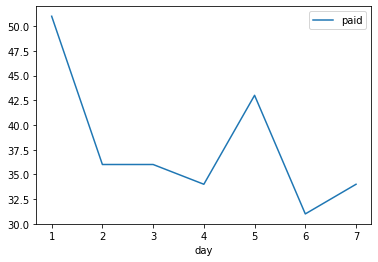

In [26]:
df.groupby(['day'])['paid'].sum().plot(legend=True)

In [32]:
#merged = df.groupby(['day', 'country'])['revenue_1m'].sum().reset_index()
merged = df.groupby('day')['revenue_1m'].sum().reset_index()
merged.head()

,day,revenue_1m
0,1,272.30
1,2,200.45
2,3,194.54
3,4,194.48
4,5,254.31


In [33]:
# try to make stacked plot ( Revenue sum by country + subscription type)

In [35]:
fig = px.line(merged, x='day', y='revenue_1m')
fig.show()

In [38]:
merged2 = df.groupby(['day', 'country'])['revenue_1m'].sum().reset_index()
merged2.head()

,day,country,revenue_1m
0,1,AU,59.85
1,1,CA,65.81
2,1,GB,74.82
3,1,US,71.82
4,2,AU,47.86


In [40]:
fig = px.line(merged2, x='day', y='revenue_1m', color='country', line_group='country', hover_name='country',
        line_shape='spline', render_mode='svg')
fig.show()